#### Below code was taken from https://learnopencv.com/image-classification-pretrained-imagenet-models-tensorflow-keras/

In [21]:
import tensorflow as tf
import matplotlib.pyplot as plt
import glob as glob
import os
from PIL import Image

In [22]:
!ls

helpers.py  __init__.py  prep.py	__pycache__
imgs	    model.py	 preprocess.py	Untitled.ipynb


In [23]:
image_root = "./imgs"

In [28]:
os.listdir(image_root)

['cat1.png', 'dog1.png', 'cat2.png', 'dog.png']

In [40]:
image_paths = sorted(glob.glob('./imgs/*.png'))
print(image_paths)

['./imgs/cat1.png', './imgs/cat2.png', './imgs/dog.png', './imgs/dog1.png']


In [43]:
os.listdir(image_root)

['cat1.png', 'dog1.png', 'cat2.png', 'dog.png']

In [44]:
# plt.figure(figsize=(18, 6))
# for idx, image_path in enumerate(image_paths):
#     image = plt.imread(image_path)
#     plt.subplot(2,4,idx+1)
#     plt.imshow(image)
#     plt.axis('off')

In [45]:
model_resnet50     = tf.keras.applications.resnet50.ResNet50()

In [46]:
print(model_resnet50.input_shape)

(None, 224, 224, 3)


In [47]:
def process_images(model, image_paths, size, preprocess_input, display_top_k=False, top_k=2):
    print(image_paths)
    plt.figure(figsize=(20,6))
    for idx, image_path in enumerate(image_paths):
        # Read the image using TensorFlow.
        tf_image = tf.io.read_file(image_path)
 
        # Decode the above `tf_image` from a Bytes string to a numeric Tensor.
        decoded_image = tf.image.decode_image(tf_image)
 
        # Resize the image to the spatial size required by the model.
        image_resized = tf.image.resize(decoded_image, size)
 
        # Add a batch dimension to the first axis (required). 
        image_batch = tf.expand_dims(image_resized, axis=0)
 
        # Pre-process the input image.
        image_batch = preprocess_input(image_batch)
 
        # Forward pass through the model to make predictions.
        preds = model.predict(image_batch)
 
        # Decode (and rank the top-k) predictions. 
        # Returns a list of tuples: (class ID, class description, probability)
        decoded_preds = tf.keras.applications.imagenet_utils.decode_predictions(
            preds=preds,
            top=5
        )
         
        if display_top_k == True:
            for jdx in range(top_k):
                print("Top {} predicted class:   Pr(Class={:20} [index={:4}]) = {:5.2f}".format(
                    jdx + 1, decoded_preds[0][jdx][1], jdx, decoded_preds[0][jdx][2] * 100))
     
        plt.subplot(2,4,idx+1)
        plt.imshow(decoded_image)
        plt.axis('off')
        label = decoded_preds[0][0][1]
        score = decoded_preds[0][0][2] * 100
        title = label + ' ' + str('{:.2f}%'.format(score))
        plt.title(title, fontsize=16)

['./imgs/cat1.png', './imgs/cat2.png', './imgs/dog.png', './imgs/dog1.png']
./imgs/cat1.png
1/1 [==============================] - 0s 174ms/step
Top 1 predicted class:   Pr(Class=Persian_cat          [index=   0]) = 85.38
Top 2 predicted class:   Pr(Class=hamper               [index=   1]) =  1.54
./imgs/cat2.png
1/1 [==============================] - 0s 69ms/step
Top 1 predicted class:   Pr(Class=tabby                [index=   0]) = 43.34
Top 2 predicted class:   Pr(Class=Persian_cat          [index=   1]) = 21.55
./imgs/dog.png
1/1 [==============================] - 0s 72ms/step
Top 1 predicted class:   Pr(Class=German_shepherd      [index=   0]) = 90.77
Top 2 predicted class:   Pr(Class=Australian_terrier   [index=   1]) =  2.46
./imgs/dog1.png
1/1 [==============================] - 0s 83ms/step
Top 1 predicted class:   Pr(Class=German_shepherd      [index=   0]) = 99.98
Top 2 predicted class:   Pr(Class=malinois             [index=   1]) =  0.01


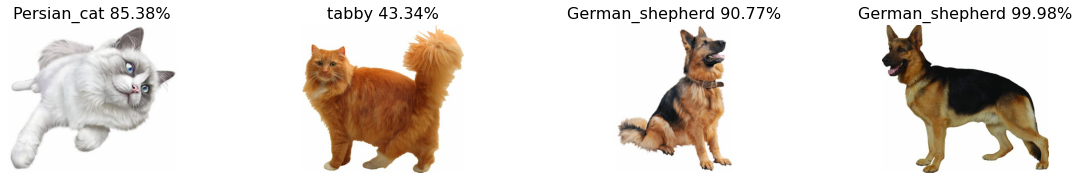

In [49]:
model = model_resnet50
size = (224, 224)
 
preprocess_input = tf.keras.applications.resnet50.preprocess_input
 
process_images(model, image_paths, size, preprocess_input, display_top_k=True)